<a href="https://colab.research.google.com/github/HaticeTuran/Machine-Learning-Exercises/blob/main/ML_UE2_Hatice_Turan_190503011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [120]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [121]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **3 + X + 2 + np.random.randn(m, 1)

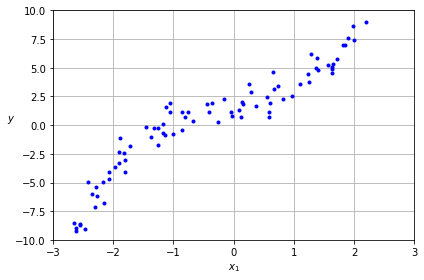

In [122]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, -10, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [123]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [124]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [125]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
#intercept = bias degerleri
#coef = weights
lin_reg.intercept_, lin_reg.coef_

(array([1.87038479]), array([[3.63581591, 0.01994678]]))

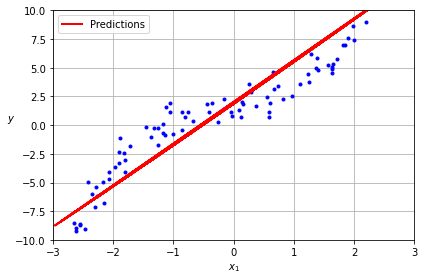

In [126]:
# extra code – this cell generates and saves Figure 4–13

X_new_poly = poly_features.transform(X)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, -10, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

In [127]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg_pred = lin_reg.predict(X)

In [128]:
#ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])
ridge_pred = ridge_reg.predict(X)

In [129]:
#Ridge Reg. with Stochastic GD 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])


array([7.37610194])

In [130]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
lasso_pred = lasso_reg.predict(X)

In [135]:
#Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])
elastic_net_pred = elastic_net.predict(X)

In [132]:
from sklearn.metrics import mean_squared_error

#Polynomial 
print("Ridge MSE: "+ str(mean_squared_error(y, ridge_pred)))
print("Lasso MSE: "+ str(mean_squared_error(y, lasso_pred)))
print("Elastic Net MSE: "+ str(mean_squared_error(y, elastic_net_pred)))
print("Polynomial MSE: "+ str(mean_squared_error(y, y_new)))
print("Linear reg. MSE: "+ str(mean_squared_error(y, lin_reg_pred)))


Ridge MSE: 4.578577675162135
Lasso MSE: 4.629300503991027
Elastic Net MSE: 4.718082704056143
Polynomial MSE: 4.575768085585685
Linear reg. MSE: 4.578573494093262


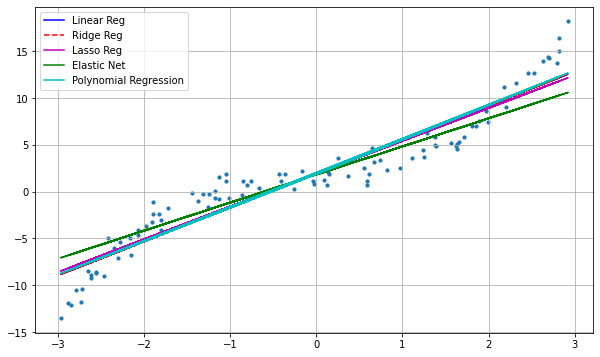

In [136]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(X, y, s=10)
plt.plot(X, lin_reg_pred, "b", label="Linear Reg")
plt.plot(X, ridge_pred, "r--", label="Ridge Reg")
plt.plot(X, lasso_pred, "m", label="Lasso Reg")
plt.plot(X, elastic_net_pred, "g", label="Elastic Net")
plt.plot(X, y_new, "c", label="Polynomial Regression")
plt.legend(loc="upper left")
plt.show()